<a href="https://colab.research.google.com/github/pedropastoriz/dev/blob/main/AulaCarmino090924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

In [ ]:
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
                'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [ ]:
df_mushroom = pd.read_csv(url, header=None, names=column_names)

In [ ]:
print(df_mushroom.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

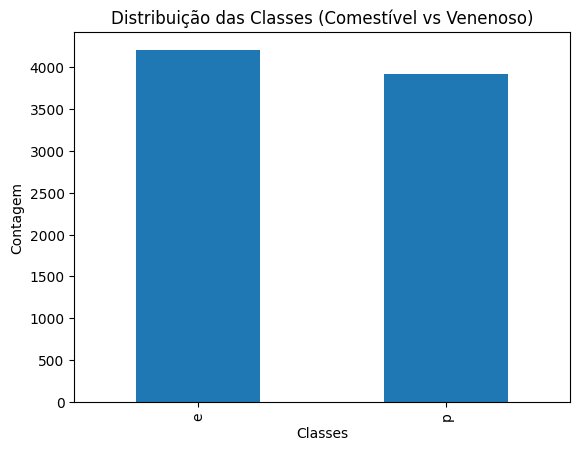

In [ ]:
df_mushroom['class'].value_counts().plot(kind='bar', title='Distribuição das Classes (Comestível vs Venenoso)', xlabel='Classes', ylabel='Contagem')
plt.show()

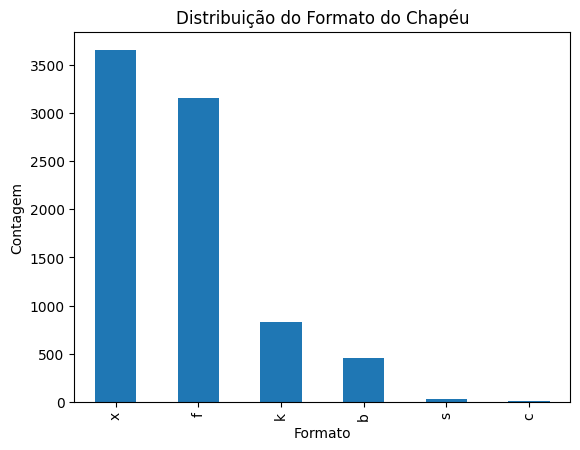

In [ ]:
df_mushroom['cap-shape'].value_counts().plot(kind='bar', title='Distribuição do Formato do Chapéu', xlabel='Formato', ylabel='Contagem')
plt.show()

In [ ]:
le = LabelEncoder()
for column in df_mushroom.columns:
    df_mushroom[column] = le.fit_transform(df_mushroom[column])

In [ ]:
# Matriz de correlação
corr = df_mushroom.corr()

In [ ]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: >

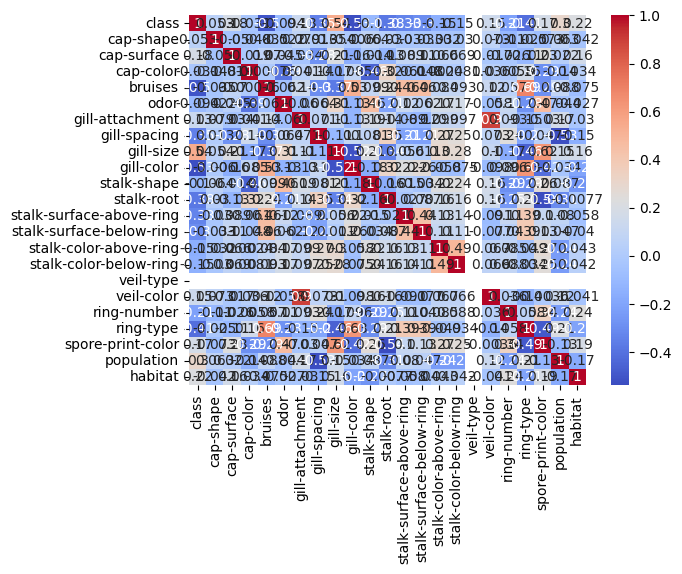

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Matriz de Correlação dos Atributos')

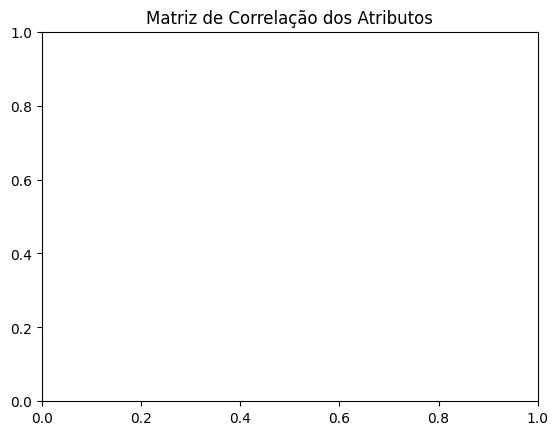

In [ ]:
plt.title('Matriz de Correlação dos Atributos')

In [ ]:
plt.show()

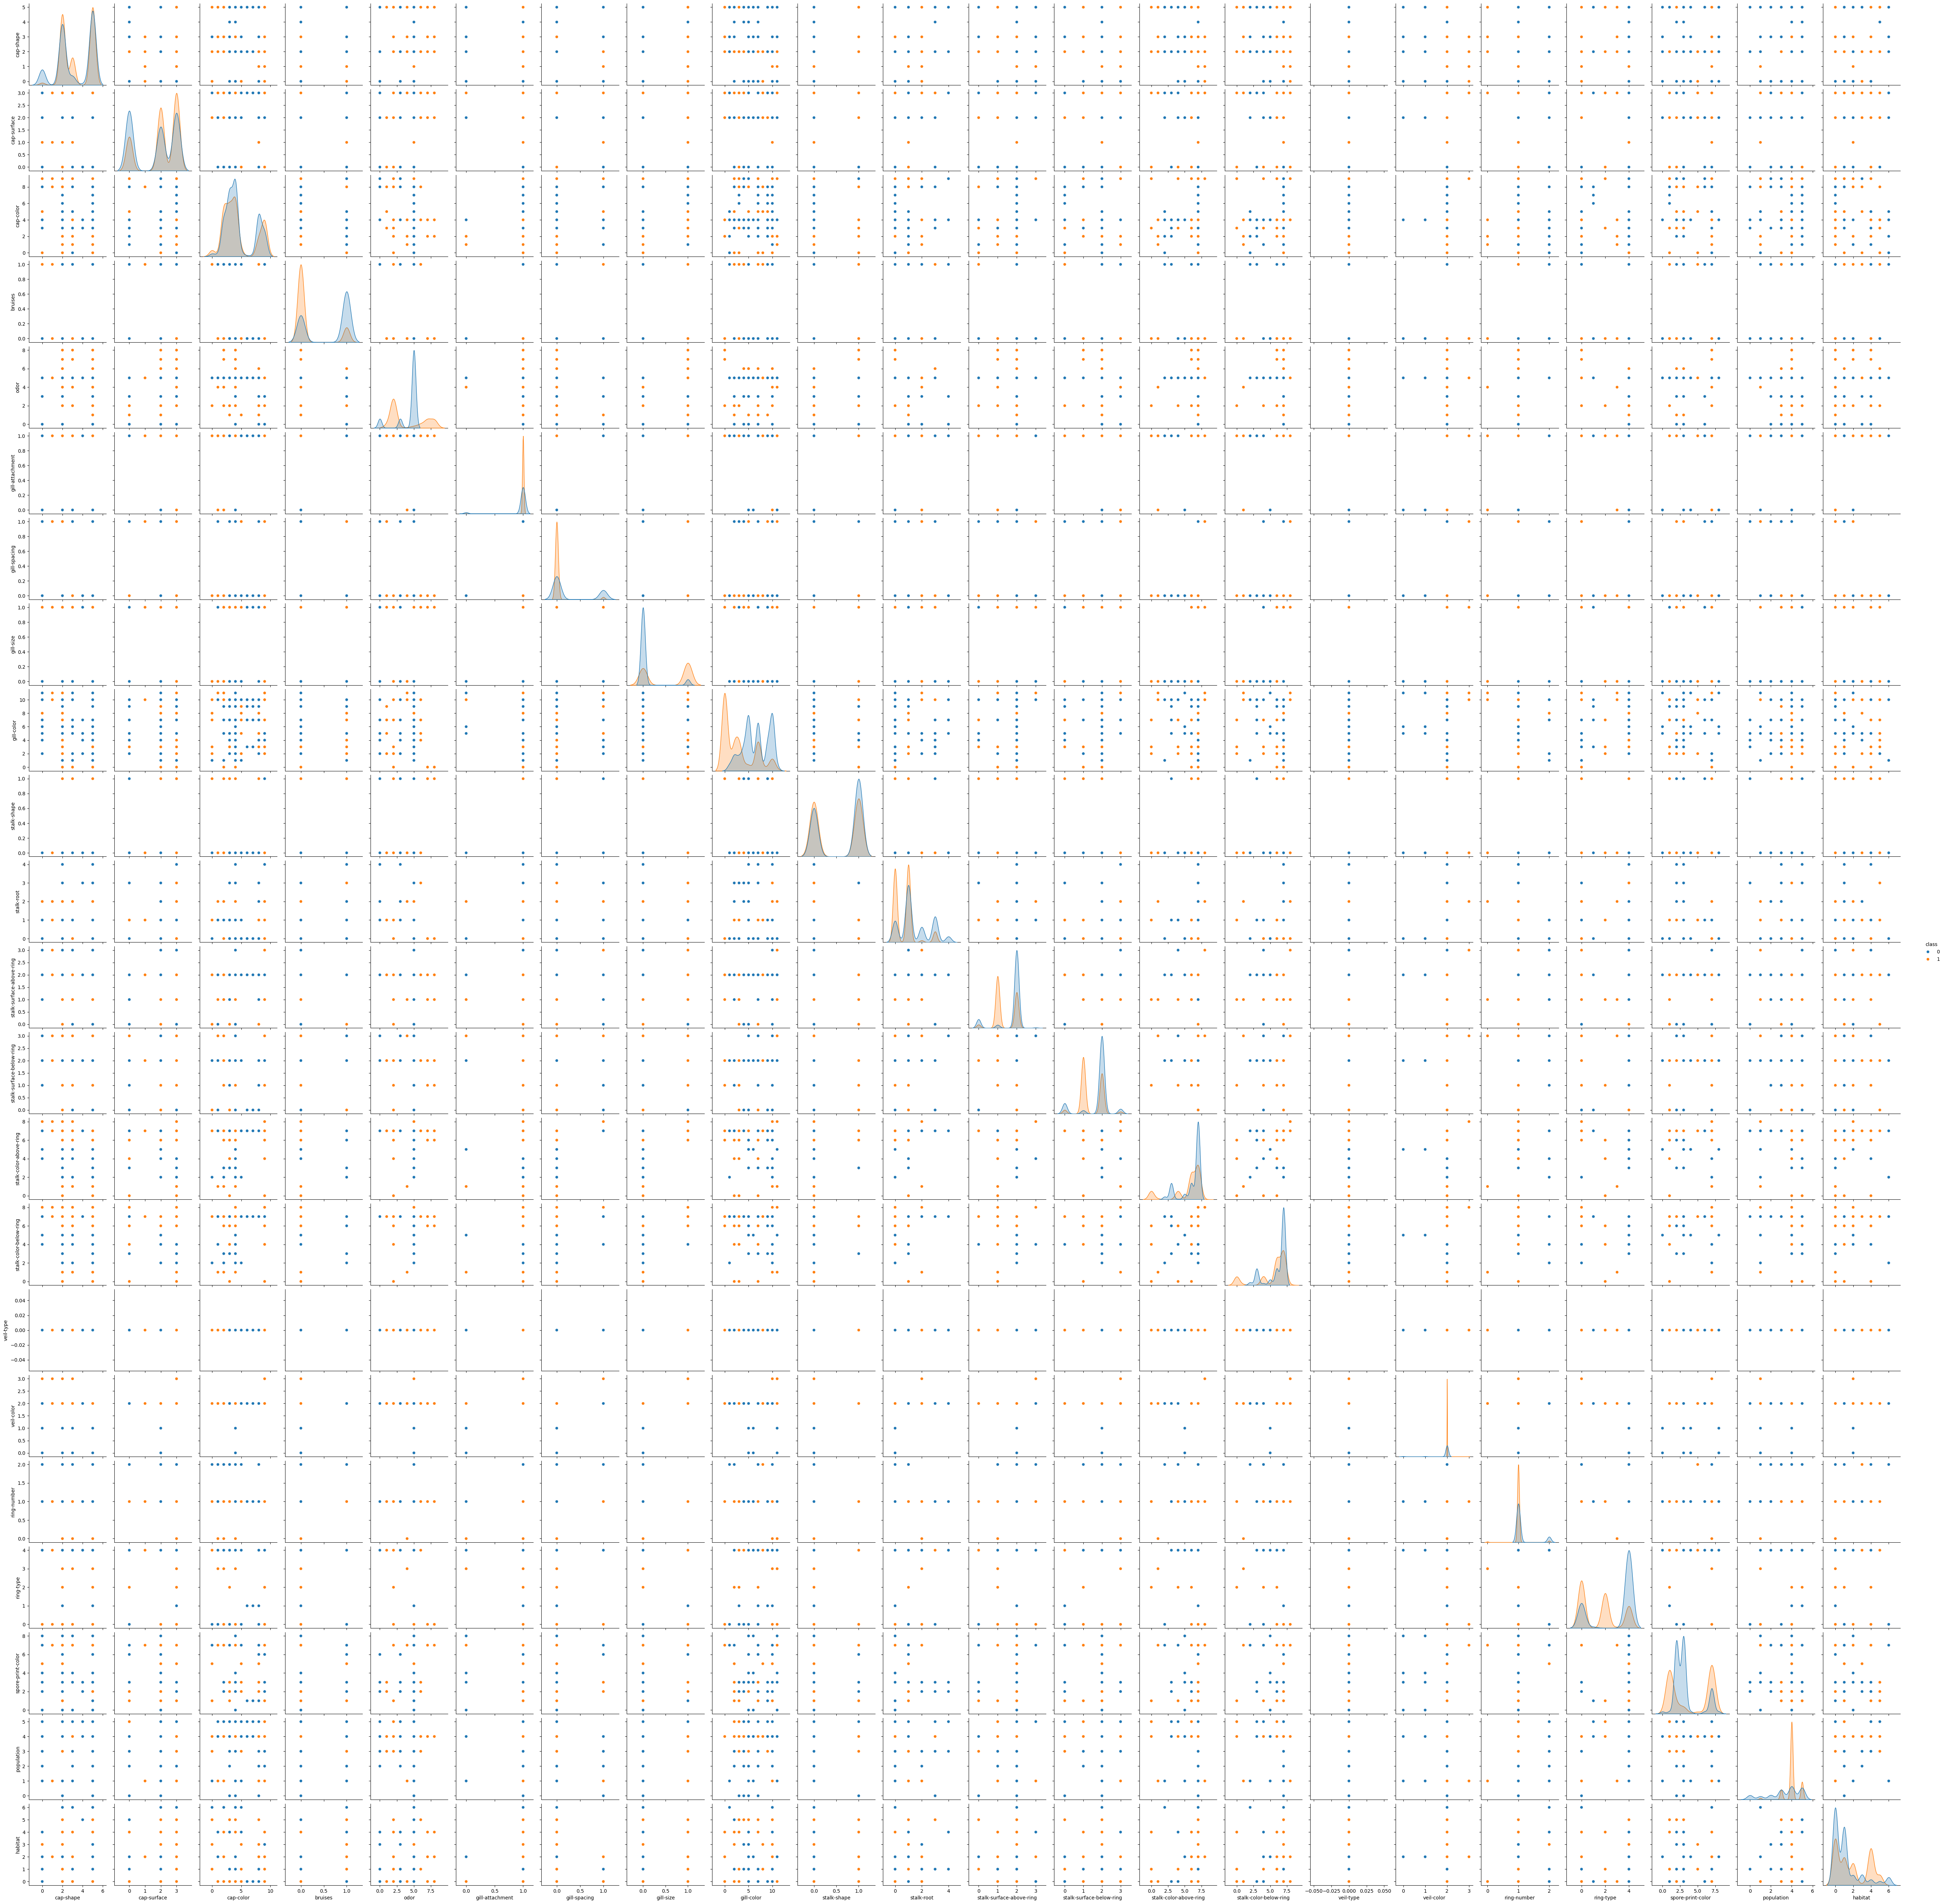

In [ ]:
sns.pairplot(df_mushroom, hue='class')

In [ ]:
plt.show()

In [ ]:
X = df_mushroom.drop('class', axis=1)
y = df_mushroom['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [ ]:
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 100.00%


In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

<Axes: >

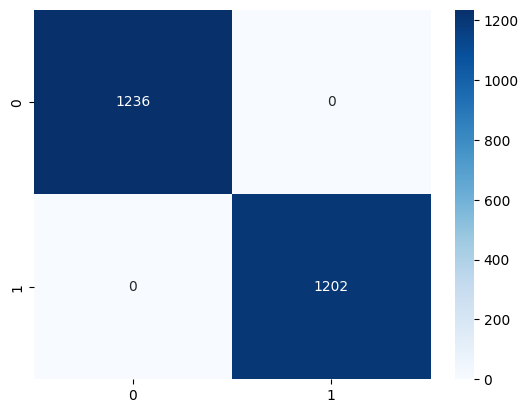

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')